Based on previous trials in prediction, I'm planning to fine tuning the model in this notebook. 

Models:
- AdaBoostRegressor with DecisionTreeRegressor as the base estimator
- RandomForestRegressor
- SVR

In [7]:
random_state=190624

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import itertools
import compose
%matplotlib inline


import sys
import os
sys.path.append(os.path.join(
    os.path.abspath(os.path.pardir), 'src'
))

import nzcompetition
from nzcompetition.preparation import make_prep_pipeline
from nzcompetition.plots import plot_train_pred, plot_pred_distribution

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import (
    Ridge, 
    Lasso, 
    ElasticNet, 
    ElasticNetCV, 
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, 
    AdaBoostRegressor
)
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV
)
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

from scipy.stats import (
    randint, 
    expon, 
    reciprocal, 
    uniform
)


y_col = 'odor'
# for plotting
lim=[0, 3.5]

# Data

Note that the data are already stored in `Xdct`, we can directly use it.

In [4]:
%store -r

In [5]:
%who

Xdct	 Xdf	 


In [9]:
X_train, y, X_test = nzcompetition.get_raw_data(target=y_col)
X_train, y = nzcompetition.drop_dup(X_train, y)

In [3]:
Xdct = dict.fromkeys(itertools.product(
    # use_seq_mut_feature
    [True, False], 
    # use_seq_prot_feature
    [True, False], 
    # use_org_feature
    [True, False], 
    # max_na_ratio
    [1.0, 0.7, 0.3], 
    # PCA nestimator
    [None, 0.98], 
))

In [4]:
for seqmut, seqprot, org, naratio, pca_n_est in Xdct.keys():
    prep_pipe = make_prep_pipeline(seqmut, seqprot, org, naratio)
    X_train_prep = prep_pipe.fit_transform(X_train)
    X_test_prep = prep_pipe.transform(X_test)
    if pca_n_est:
        pca = PCA(pca_n_est)
        X_train_prep = pca.fit_transform(X_train_prep)
        X_test_prep = pca.transform(X_test_prep)
    Xdct[(seqmut, seqprot, org, naratio, pca_n_est)] = (X_train_prep, X_test_prep)


/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(protdf[['molweight_u', 'molweight_p']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(p

/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(protdf[['molweight_u', 'molweight_p']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green'

/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(protdf[['molweight_u', 'molweight_p']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(p

/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(protdf[['molweight_u', 'molweight_p']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(p

/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(protdf[['molweight_u', 'molweight_p']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green'

In [15]:
Xdf = pd.DataFrame(Xdct.keys(), columns=[
    'use_seq_mut_feature', 
    'use_seq_prot_feature', 
    'use_org_feature', 
    'max_na_ratio', 
    'pca'
])

Xdf = Xdf.set_index([
    'use_seq_mut_feature', 
    'use_seq_prot_feature', 
    'use_org_feature', 
    'max_na_ratio', 
    'pca'])
for col in ['Adaboost_MSE', 'Randfor_MSE', 'SVR_MSE']:
    Xdf[col] = np.nan

Now we can use the `seqmut, seqprot, org, naratio, pca_n_est` as key to access the processed training and test data in `Xdct`. And we can store the performance of each model to `Xdf`. 

# AdaBoostRegressor

In [10]:
model_column = 'Adaboost_MSE'
best_ada_CV = None

for seqmut, seqprot, org, naratio, pca_n_est in Xdct.keys():
    X, _ = Xdct[(seqmut, seqprot, org, naratio, pca_n_est)]
    params = dict(
        base_estimator__max_depth=[3,4,5, 6],
        base_estimator__min_samples_leaf=[4, 5, 6, 7],
        base_estimator__min_samples_split=[5, 6, 7, 8],
        base_estimator__max_features=['sqrt', 'log2', 'auto', 0.5, 0.7],
        learning_rate=[0.5, 1.0, 1.5]
    )

    grid_search = GridSearchCV(
        AdaBoostRegressor(
            base_estimator=DecisionTreeRegressor(), 
            random_state=random_state,
            n_estimators=50, 
        ), 
        param_grid=params,
        scoring='neg_mean_squared_error', 
        n_jobs=16, 
        cv=5, 
        verbose=0, 
        iid=False, 
    )
    grid_search.fit(X, y)
    
    if best_ada_CV is None:
        best_ada_CV = grid_search
    elif best_ada_CV.best_score_ < grid_search.best_score_:
        best_ada_CV = grid_search

    Xdf.loc[(seqmut, seqprot, org, naratio, pca_n_est), model_column] = grid_search.best_score_ * -1.0

/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-

/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-

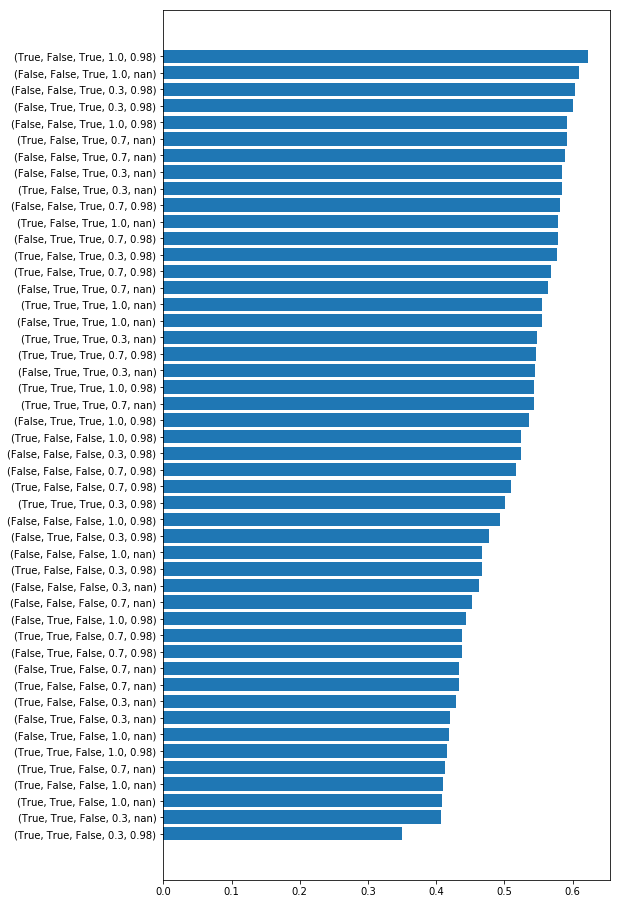

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))

ax.barh(range(Xdf.shape[0]), Xdf[model_column].sort_values())
ax.set_yticks(range(Xdf.shape[0]))
ax.set_yticklabels(Xdf[model_column].sort_values().index)

fig.show()

We'll use the `TTF03098` to denote the best preparation pipeline.

Now let's fine tune the model.

In [35]:
X, Xval = Xdct[(True, True, False, 0.3, 0.98)]

In [36]:
param_dist = dict(
    base_estimator__max_depth=randint(3, 6),
    base_estimator__min_samples_leaf=randint(3, 15),
    base_estimator__min_samples_split=randint(4, 15),
    base_estimator__max_features=uniform(0.3, 0.7),
    learning_rate=uniform(0.5, 1)
)

rand_search = RandomizedSearchCV(
    AdaBoostRegressor(
        base_estimator=DecisionTreeRegressor(), 
        n_estimators=200, 
    ), 
    param_distributions=param_dist, 
    n_iter=20000, 
    scoring='neg_mean_squared_error', 
    n_jobs=16, 
    cv=5, 
    verbose=0, 
    iid=False, 
)

In [37]:
rand_search.fit(X, y)

Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/z/datalake/virtual_envs/20190813T102726/Ubuntu16.04/lib/python3.5/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/joblib/externals/loky/backend/synchronize.py", line 96, in _cleanup
    sem_unlink(name)
FileNotFoundError: [Errno 2] No such file or directory
Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/z/datalake/virtual_envs/20190813T102726/Ubuntu16.04/lib/python3.5/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/joblib/externals/loky/backend/synchronize.py", line 96, in _cleanup
    sem_unlink(name)
FileNotFoundError: [Errno 2] No such file or directory
Exception ignored in: <Finalize ob

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                                                    max_depth=None,
                                                                                    max_features=None,
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=2,
                                                                                    min_weight_fraction_

In [38]:
print(rand_search.best_params_, rand_search.best_score_)

{'base_estimator__min_samples_split': 10, 'base_estimator__max_depth': 5, 'learning_rate': 0.6761997350188298, 'base_estimator__min_samples_leaf': 8, 'base_estimator__max_features': 0.870076057438373} -0.34298156092158144


In [14]:
print(best_ada_CV.best_params_, best_ada_CV.best_score_)

{'base_estimator__min_samples_split': 5, 'base_estimator__max_depth': 5, 'learning_rate': 1.0, 'base_estimator__min_samples_leaf': 4, 'base_estimator__max_features': 'auto'} -0.3492324593740159


Thus we can update the true best adaboostregressor now.

In [39]:
best_ada_CV = rand_search

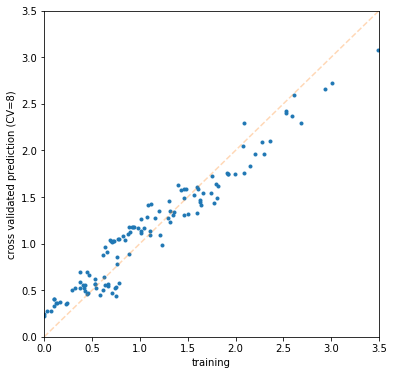

In [40]:
plot_train_pred(y, best_ada_CV.predict(X), lim)

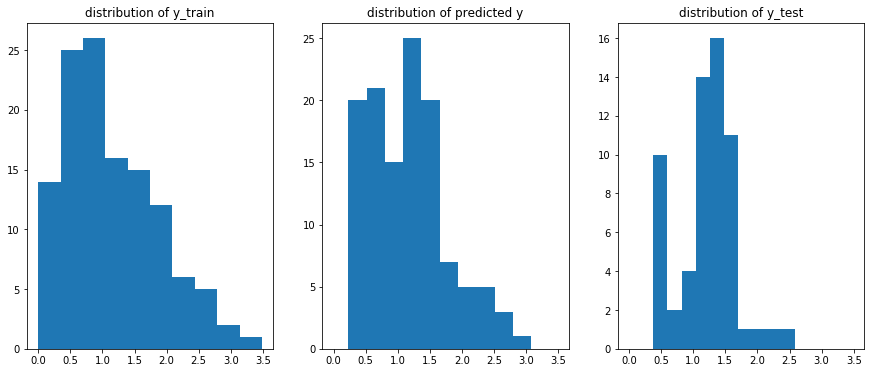

In [42]:
plot_pred_distribution(y, best_ada_CV.predict(X), best_ada_CV.predict(Xval))

Now we save the model and prediction.

In [43]:
pd.DataFrame(
    best_ada_CV.predict(Xval), 
    index=X_test.droplevel('Organism Code').index, 
    columns=['pred'], 
    dtype='float'
).to_csv('../output/odor_TTF03098_adaboost.csv')

In [44]:
joblib.dump(best_ada_CV.best_estimator_, '../models/odor_TTF03098_adaboost.pkl')

['../models/odor_TTF03098_adaboost.pkl']

This model gets a MSE 0.3035 in validation set.

# RandomForestRegressor

In [28]:
model_column = 'Randfor_MSE'

In [29]:
best_randfor_CV = None
for seqmut, seqprot, org, naratio, pca_n_est in Xdct.keys():
    X, _ = Xdct[(seqmut, seqprot, org, naratio, pca_n_est)]
    param = dict(
        max_depth=[3,4,5,6], 
        max_features=['sqrt', 'log2', 'auto', 0.7, 0.9],
        min_samples_leaf=[5,6,7,8]
    )

    grid_search = GridSearchCV(
        RandomForestRegressor(n_estimators=100), 
        param_grid=param,
        scoring='neg_mean_squared_error', 
        n_jobs=16, 
        cv=5, 
        verbose=0, 
        iid=False, 
    )
    grid_search.fit(X, y)

    if best_randfor_CV is None:
        best_randfor_CV = grid_search
    elif best_randfor_CV.best_score_ < grid_search.best_score_:
        best_randfor_CV = grid_search
        
    Xdf.loc[(seqmut, seqprot, org, naratio, pca_n_est), model_column] = grid_search.best_score_ * -1.0

/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-

/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-

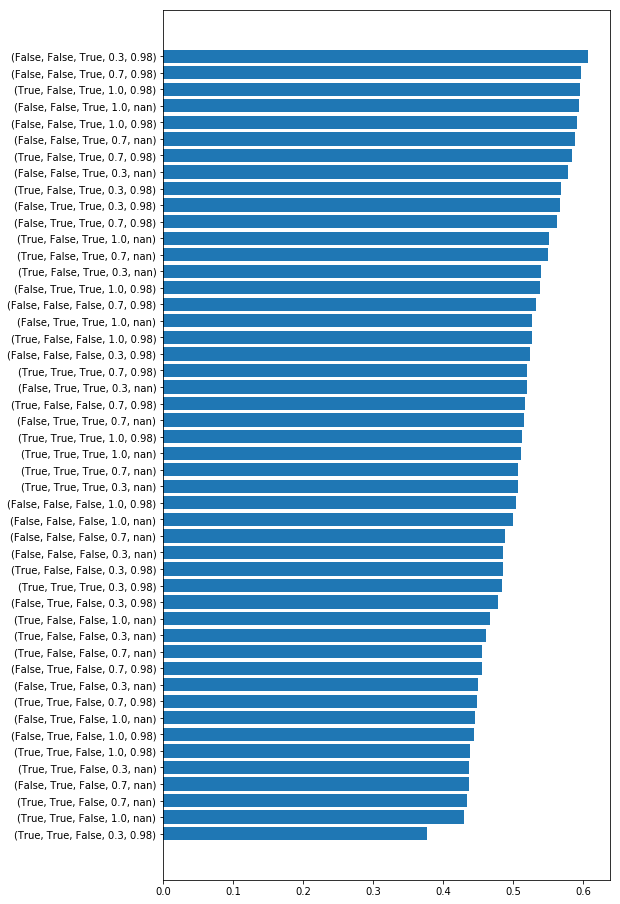

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))

ax.barh(range(Xdf.shape[0]), Xdf[model_column].sort_values())
ax.set_yticks(range(Xdf.shape[0]))
ax.set_yticklabels(Xdf[model_column].sort_values().index)

fig.show()

Now we know the best preparation code for RandomForestRegressor is `TTF03098`.

In [31]:
best_randfor_CV.best_params_

{'max_depth': 3, 'max_features': 0.9, 'min_samples_leaf': 8}

Now fine tune the model.

In [51]:
X, Xval = Xdct[(True, True, False, 0.3, 0.98)]

In [56]:
param_dist = dict(
    max_depth=randint(3, 6),
    min_samples_leaf=randint(3, 15),
    min_samples_split=randint(4, 15),
    max_features=uniform(0.2, 0.8),
)

rand_search = RandomizedSearchCV(
    RandomForestRegressor(
        n_estimators=300, 
    ), 
    param_distributions=param_dist, 
    n_iter=20000, 
    scoring='neg_mean_squared_error', 
    n_jobs=10, 
    cv=5, 
    verbose=1, 
    iid=False, 
)

In [57]:
rand_search.fit(X, y)

Fitting 5 folds for each of 20000 candidates, totalling 100000 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   16.2s
Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/z/datalake/virtual_envs/20190813T102726/Ubuntu16.04/lib/python3.5/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/joblib/externals/loky/backend/synchronize.py", line 96, in _cleanup
    sem_unlink(name)
FileNotFoundError: [Errno 2] No such file or directory
Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/z/datalake/virtual_envs/20190813T102726/Ubuntu16.04/lib/python3.5/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/z/datalake/virtual_envs/current/Ubuntu16.04/lib/p

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=300,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=...


In [59]:
print(rand_search.best_params_, rand_search.best_score_)

{'max_features': 0.8982227202846549, 'min_samples_leaf': 3, 'min_samples_split': 9, 'max_depth': 4} -0.3716353287242649


In [60]:
print(best_randfor_CV.best_params_, best_randfor_CV.best_score_)

{'max_features': 0.9, 'min_samples_leaf': 8, 'max_depth': 3} -0.37646586966564016


Thus we can update the model.

In [61]:
best_randfor_CV = rand_search

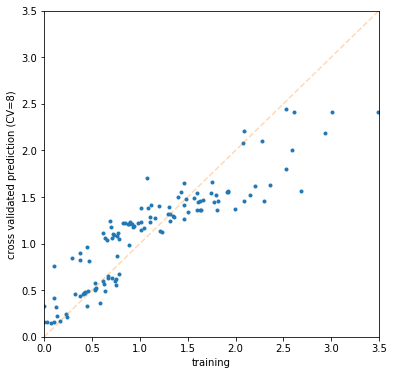

In [62]:
plot_train_pred(y, best_randfor_CV.predict(X), lim)

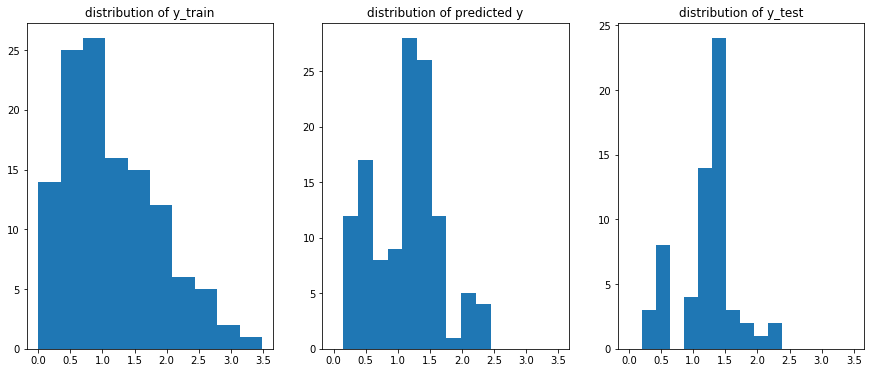

In [63]:
plot_pred_distribution(y, best_randfor_CV.predict(X), best_randfor_CV.predict(Xval))

In [64]:
pd.DataFrame(
    best_randfor_CV.predict(Xval), 
    index=X_test.droplevel('Organism Code').index, 
    columns=['pred'], 
    dtype='float'
).to_csv('../output/odor_TTF03098_randfor.csv')

In [65]:
joblib.dump(best_randfor_CV.best_estimator_, '../models/odor_TTF03098_randfor.pkl')

['../models/odor_TTF03098_randfor.pkl']

In [66]:
%store Xdct

Stored 'Xdct' (dict)


In [67]:
%store Xdf

Stored 'Xdf' (DataFrame)


# SVR

In [ ]:
model_column = 'SVR_MSE'

best_svr_CV = None
for seqmut, seqprot, org, naratio, pca_n_est in Xdct.keys():
    X, _ = Xdct[(seqmut, seqprot, org, naratio, pca_n_est)]
    param = dict(
        kernel=['rbf', 'linear', 'sigmoid'], 
        gamma=['auto', 0.01, 0.03, 0.1, 0.3, 1, 3], 
        C=[0.01, 0.03, 0.1, 1, 3, 10], 
        epsilon=[0.01, 0.03, 0.1, 0.3, 0.5]
    )

    grid_search = GridSearchCV(
        SVR(), 
        param_grid=param,
        scoring='neg_mean_squared_error', 
        n_jobs=16, 
        cv=5, 
        verbose=0, 
        iid=False, 
    )
    grid_search.fit(X, y)

    if best_svr_CV is None:
        best_svr_CV = grid_search
    elif best_svr_CV.best_score_ < grid_search.best_score_:
        best_svr_CV = grid_search
        
    Xdf.loc[(seqmut, seqprot, org, naratio, pca_n_est), model_column] = grid_search.best_score_ * -1.0

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))

ax.barh(range(Xdf.shape[0]), Xdf[model_column].sort_values())
ax.set_yticks(range(Xdf.shape[0]))
ax.set_yticklabels(Xdf[model_column].sort_values().index)

fig.show()

Now we know the best preparation code for SVR is also `TFF03N`.

In [ ]:
best_svr_CV.best_params_

Now we can fine tune this model.

In [ ]:
X, Xval = Xdct[(True, False, False, 0.3, None)]

In [ ]:
plot_train_pred(y, best_svr_CV.predict(X), lim)

In [ ]:
plot_pred_distribution(y, best_svr_CV.predict(X), best_svr_CV.predict(Xval))

In [ ]:
pd.DataFrame(
    best_svr_CV.predict(Xval), 
    index=X_test.droplevel('Organism Code').index, 
    columns=['pred'], 
    dtype='float'
).to_csv('../output/performance_TFF03N_svr.csv')

In [ ]:
joblib.dump(best_svr_CV.best_estimator_, '../models/performance_TFF03N_svr.pkl')